# HuBMAP - Hacking the Human Vasculature

This notebook is for exploratory data analysis (EDA) on the HuBMAP dataset.

Kaggle competition link: https://www.kaggle.com/competitions/hubmap-hacking-the-human-vasculature/overview

In [1]:
import os
import json

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
with open(os.path.join('data', 'polygons.jsonl'), 'r') as polygons_file:
    polygons_list = list(polygons_file)

polygons = [json.loads(p) for p in polygons_list[50:55]]

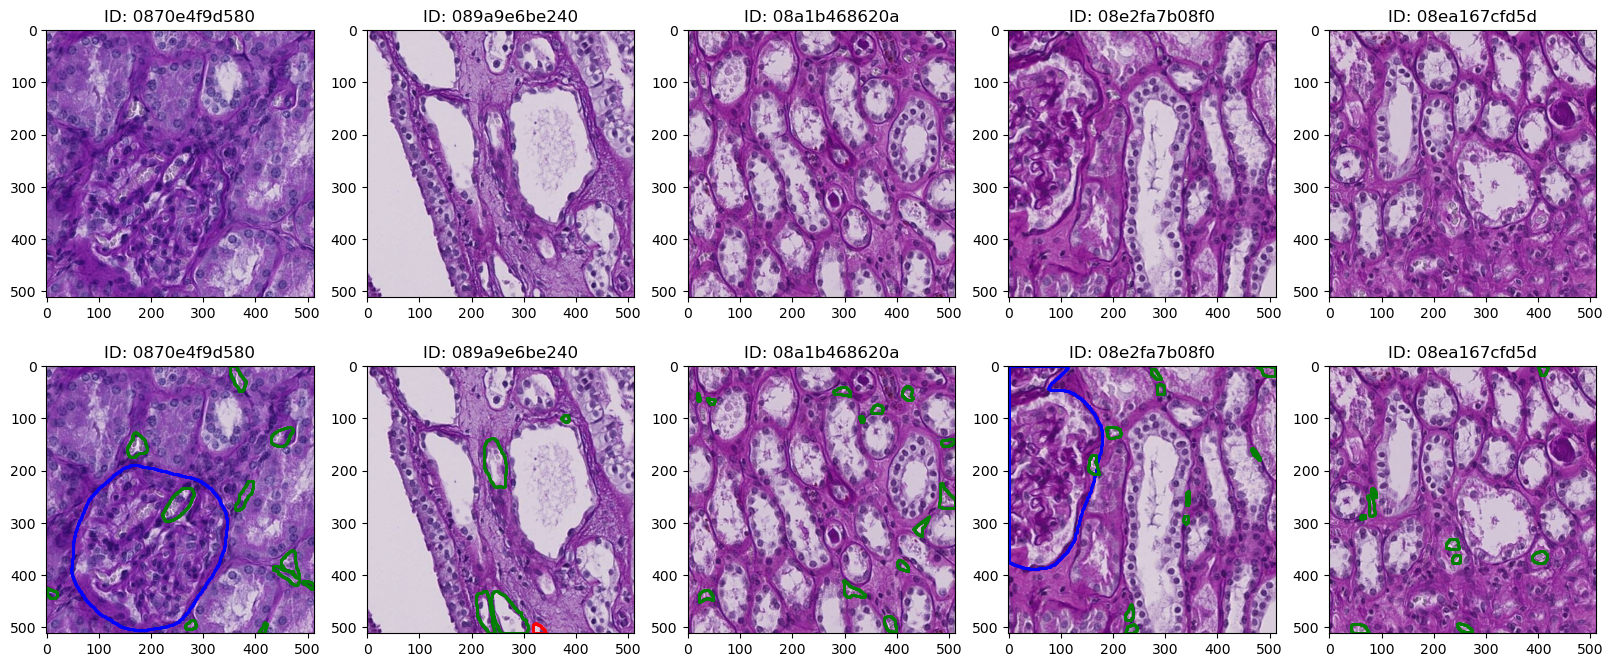

In [3]:
def plot_images(annotations, ax, plot_annoations=False):
    im = Image.open(os.path.join('data', 'train', f"{annotations['id']}.tif"))
    im_array = np.array(im)
    if plot_annoations:
        for ann in annotations['annotations']:
            type = ann['type']
            coordinates = ann['coordinates']
            for coord in coordinates:
                points = np.array(coord)
                if type == 'glomerulus':
                    ax.scatter(points[:, 0], points[:, 1], c='blue', alpha=1.0, s=1)
                elif type == 'blood_vessel':
                    ax.scatter(points[:, 0], points[:, 1], c='green', alpha=1.0, s=1)
                else:
                    ax.scatter(points[:, 0], points[:, 1], c='red', alpha=1.0, s=1)
    ax.imshow(im_array)
    ax.set_title(f"ID: {annotations['id']}")

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, p in enumerate(polygons):
    plot_images(p, axes[0][i])
    plot_images(p, axes[1][i], plot_annoations=True)